In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 2.8 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [190]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from termcolor import colored as cl
import seaborn as sb

In [191]:
plt.rcParams['figure.figsize']=(20,10)
sb.set_style('whitegrid')

In [192]:
import xlrd
df=pd.read_excel("/Users/hlab.3/Desktop/newxlrd/SOCAR_BCase_Data1.xlsx")

In [197]:
###Total Booking ####
tot_book=df.groupby(['user_id']).size()
newdf=tot_book.to_frame(name='total_booking')
newdf

,total_booking
user_id,
31668,1
31670,1
31672,1
31679,1
31681,1
...,...
84765,1
84768,2
84771,1


In [202]:
newdf.to_csv('Total_booking.csv')

In [194]:
### Average Coupon Rate ###

df1=pd.read_excel("/Users/hlab.3/Desktop/newxlrd/SOCAR_BCase_Data1.xlsx",sheet_name='Table2')
df1.head(5)

,reservation_id,user_id,gross_rev,net_rev,promo
0,3304,31700,990.0,495.0,JOMTREVO
1,3307,31668,360.0,180.0,JOMTREVO
2,3311,31702,400.0,200.0,JOMTREVO
3,3331,31742,121.0,66.0,JOMTREVO
4,3332,31701,215.0,117.5,JOMTREVO


In [171]:
df1['coupon_rate']=df1.gross_rev-df1.net_rev
print(df1)

      reservation_id  user_id  gross_rev  net_rev       promo  coupon_rate
0               3304    31700      990.0    495.0    JOMTREVO        495.0
1               3307    31668      360.0    180.0    JOMTREVO        180.0
2               3311    31702      400.0    200.0    JOMTREVO        200.0
3               3331    31742      121.0     66.0    JOMTREVO         55.0
4               3332    31701      215.0    117.5    JOMTREVO         97.5
...              ...      ...        ...      ...         ...          ...
9144           75547    47465       70.0     56.0  CUTICUTI20         14.0
9145           75550    72306      220.0    176.0  CUTICUTI20         44.0
9146           75582    40440       87.0     69.6  CUTICUTI20         17.4
9147           75585    36536      150.0     75.0    JOMTREVO         75.0
9148           75637    64967      100.0     50.0    JOMTREVO         50.0

[9149 rows x 6 columns]


In [172]:
avg_coupon=(df1['coupon_rate'].mean())
avg_coupon

137.509920209859

In [185]:
avg_basket=(df1['gross_rev'].mean())
avg_basket

290.9150180347579

count    9149.000000
mean      137.509920
std       132.726584
min         0.000000
25%        48.600000
50%       100.000000
75%       194.500000
max      1490.000000
Name: coupon_rate, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


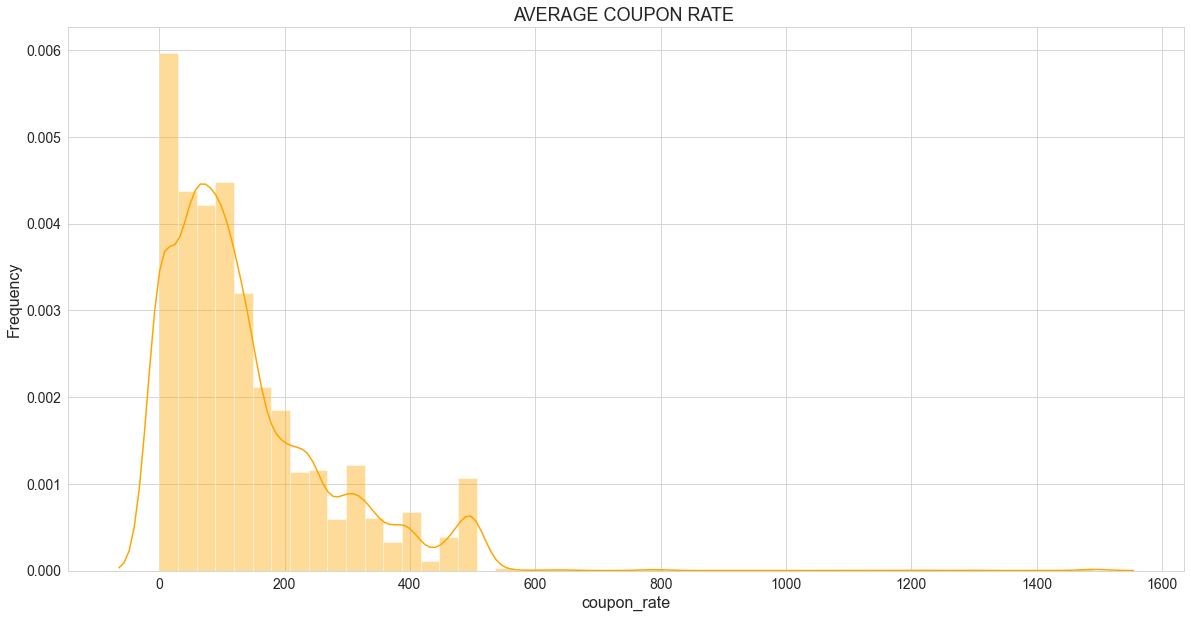

In [173]:
print(cl(df1['coupon_rate'].describe(), attrs = ['bold']))

sb.distplot(df1['coupon_rate'], 
            color = 'orange')
plt.title('AVERAGE COUPON RATE ', 
          fontsize = 18)
plt.xlabel('coupon_rate', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_distribution.png')
plt.show()

In [203]:
df['new_date']=pd.to_datetime(df['return_date']).dt.date
df['mem_first_trip']=df['new_date']-pd.to_timedelta(df['duration'],unit='d')
df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arrays/datetimelike.py:1108: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


,reservation_id,user_id,return_date,week,resv_start_day,resv_start_hour,city,car_name,duration,age,new_date,mem_first_trip
0,3304,31700,2020-06-18 18:30:00,2020-25,Tuesday,18,KV,CITY 1.5L S,9,30,2020-06-18,2020-06-09
1,3307,31668,2020-06-15 12:00:00,2020-25,Friday,12,KV,ARUZ-1500X (AUTO),3,38,2020-06-15,2020-06-12
2,3311,31702,2020-06-15 07:00:00,2020-25,Saturday,7,KV,city,2,32,2020-06-15,2020-06-13
3,3331,31742,2020-06-14 08:30:00,2020-24,Saturday,8,KV,HR-V 1.8L S,1,30,2020-06-14,2020-06-13
4,3332,31701,2020-06-14 20:00:00,2020-24,Friday,16,KV,Myvi EZI 1.3,3,27,2020-06-14,2020-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...
9144,75547,47465,2021-04-05 08:00:00,2021-14,Sunday,8,KV,Persona 1.6 AT,1,32,2021-04-05,2021-04-04
9145,75550,72306,2021-04-04 23:30:00,2021-13,Saturday,23,KV,D MAX 4x2,1,27,2021-04-04,2021-04-03
9146,75582,40440,2021-04-05 12:00:00,2021-14,Sunday,12,KV,Myvi 1.5,1,31,2021-04-05,2021-04-04
9147,75585,36536,2021-04-05 09:30:00,2021-14,Sunday,9,KV,ARUZ-1500 X (AUTO),2,33,2021-04-05,2021-04-03


In [204]:
df.to_csv('Total_book.csv')

In [205]:
a=df.groupby('user_id').mem_first_trip.agg(['min']).reset_index()
a

,user_id,min
0,31668,2020-06-12
1,31670,2020-06-11
2,31672,2020-06-25
3,31679,2020-08-08
4,31681,2020-06-19
...,...,...
5899,84765,2020-11-07
5900,84768,2020-10-15
5901,84771,2020-10-17
5902,84774,2020-10-14


In [206]:
a.to_csv('Total_book2.csv')

In [175]:
df2=pd.read_excel("/Users/hlab.3/Desktop/newxlrd/SOCAR_BCase_Data1.xlsx",sheet_name='Table3')
df2

,user_id,first_return_date,first_rid,signupdate
0,31668,2020-06-09 16:41:00,3307,2020-06-09
1,31670,2020-06-11 14:58:00,3343,2020-06-09
2,31672,2020-06-22 20:35:00,3762,2020-06-09
3,31679,2020-08-08 16:19:00,9897,2020-06-09
4,31681,2020-06-19 13:41:00,3596,2020-06-09
...,...,...,...,...
5899,84765,2020-10-16 16:58:00,26371,2020-10-12
5900,84768,2020-10-13 12:42:00,26009,2020-10-12
5901,84771,2020-10-18 11:22:00,26535,2020-10-12
5902,84774,2020-10-13 11:29:00,26002,2020-10-12


In [207]:
df.drop(["user_id"], axis = 1, inplace=True)

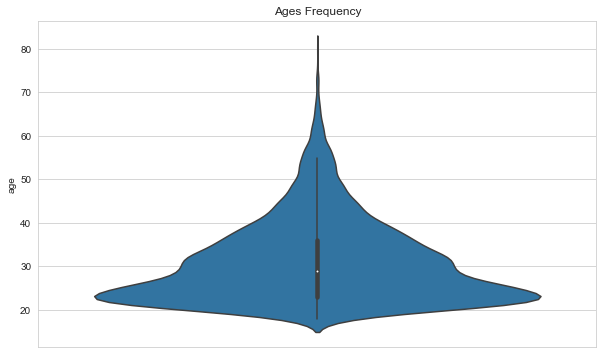

In [208]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

In [209]:
df1=pd.read_excel("/Users/hlab.3/Desktop/newxlrd/SOCAR_BCase_Data1.xlsx",sheet_name='Table2')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9149 entries, 0 to 9148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reservation_id  9149 non-null   int64  
 1   user_id         9149 non-null   int64  
 2   gross_rev       9149 non-null   float64
 3   net_rev         9149 non-null   float64
 4   promo           7812 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 357.5+ KB


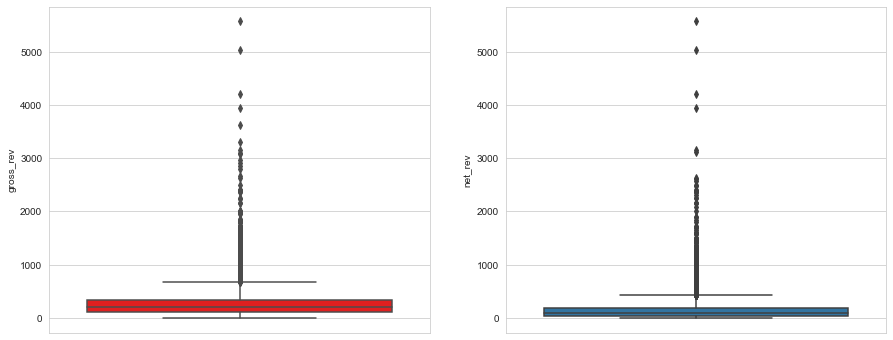

In [210]:
### Analysis ###
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df1["gross_rev"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df1["net_rev"])
plt.show()

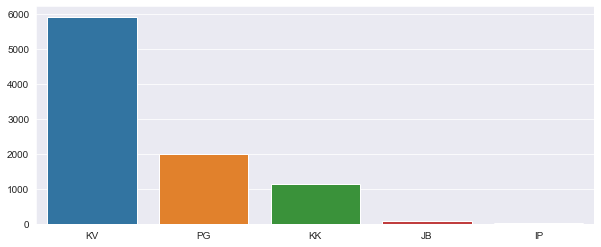

In [211]:
a = df.city.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=a.index, y=a.values)
plt.show()

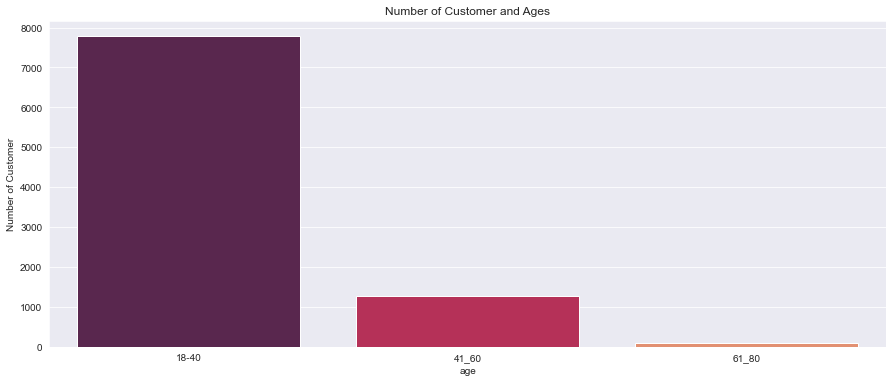

In [212]:
age18_40 = df.age[(df.age <= 40) & (df.age >= 18)]
age41_60 = df.age[(df.age <= 60) & (df.age >= 41)]
age61_80 = df.age[(df.age <= 80) & (df.age >= 61)]
x = ["18-40","41_60","61_80"]
y = [len(age18_40.values),len(age41_60.values),len(age61_80.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("age")
plt.ylabel("Number of Customer")
plt.show()

In [214]:
df1.drop(["promo"], axis = 1, inplace=True)

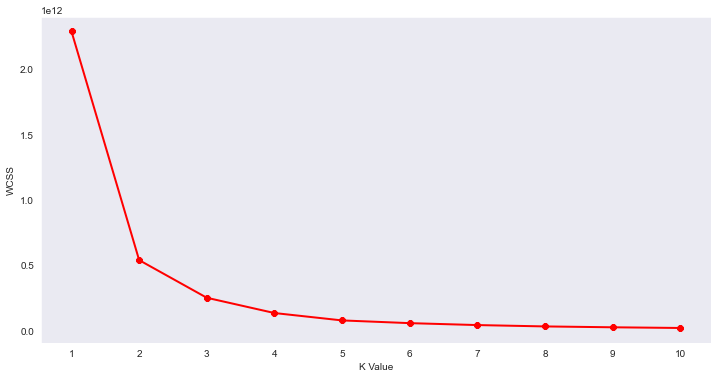

In [215]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

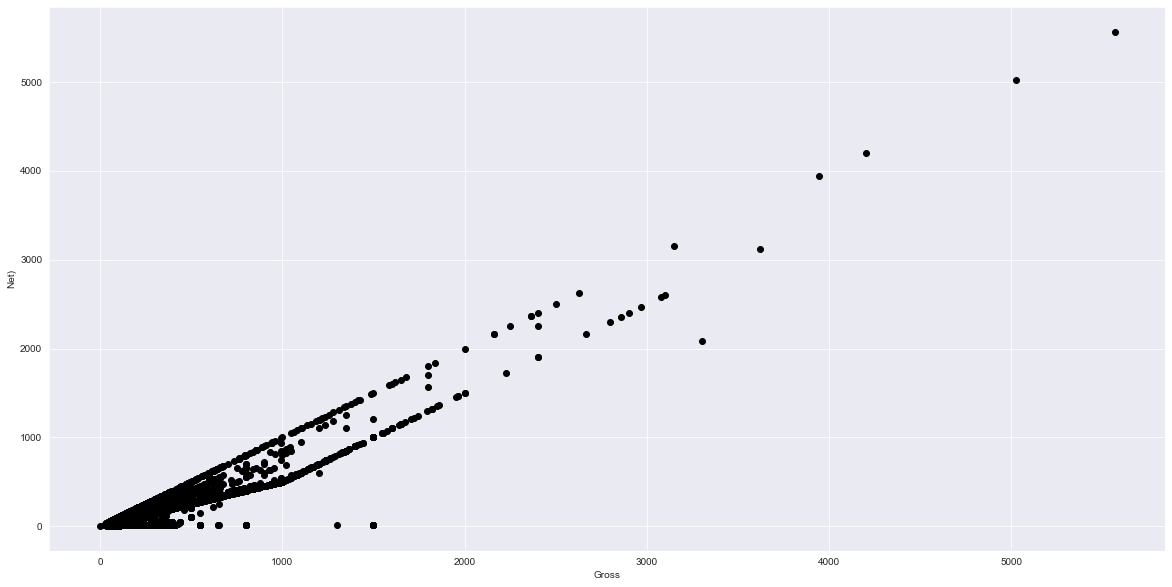

In [217]:
X = df1[["gross_rev","net_rev"]]
#Visualise data points
plt.scatter(X["gross_rev"],X["net_rev"],c='black')
plt.xlabel('Gross')
plt.ylabel('Net)')
plt.show()

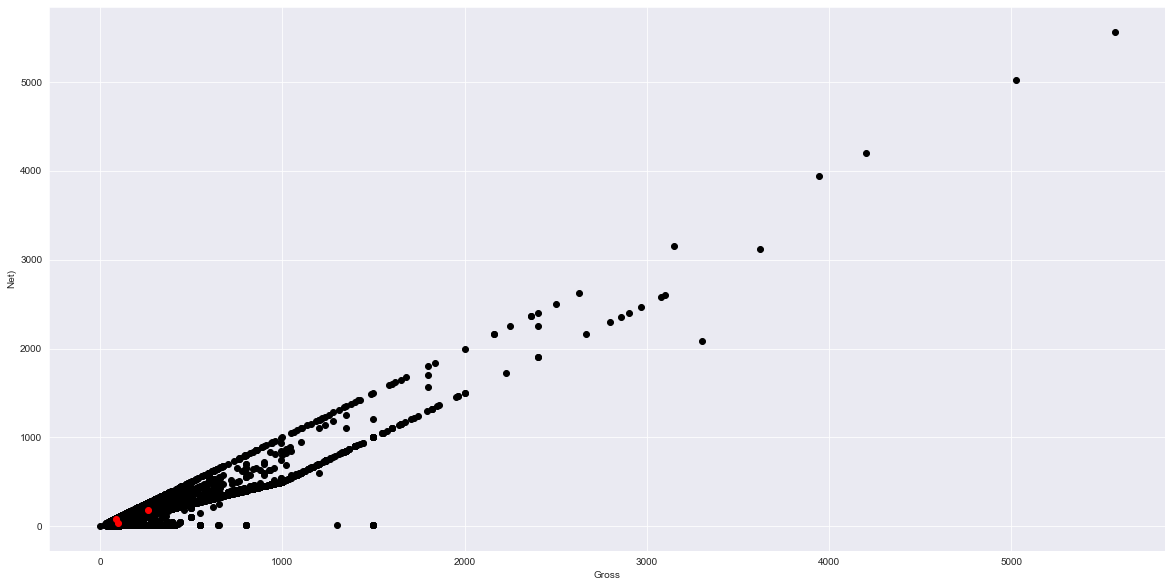

In [218]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["gross_rev"],X["net_rev"],c='black')
plt.scatter(Centroids["gross_rev"],Centroids["net_rev"],c='red')
plt.xlabel('Gross')
plt.ylabel('Net)')
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["gross_rev"]-row_d["gross_rev"])**2
            d2=(row_c["net_rev"]-row_d["net_rev"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["gross_rev","net_rev"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['gross_rev'] - Centroids['gross_rev']).sum() + (Centroids_new['net_rev'] - Centroids['net_rev']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["gross_rev","net_rev"]]

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    df1=X[X["Cluster"]==k+1]
    plt.scatter(df1["gross_rev"],df1["net_rev"],c=color[k])
plt.scatter(Centroids["gross_rev"],Centroids["net_rev"],c='red')
plt.xlabel('Gross')
plt.ylabel('Net(In Thousands)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

In [ ]:
kmeans.inertia_

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()